# Task 4

---

### Imports and sampling of data

In [26]:
# libraries
import pandas as pd
from matplotlib import pyplot
from sklearn import metrics 
from sklearn.model_selection import KFold
import numpy as np 
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
#paths to the file containing the samples with the processed features
feature_of_counts = "../processed_data/feature_vectors_counts_new.csv"

In [28]:
# Importing the dataset, and performing an undersampling of the benignware
dataset = pd.read_csv(feature_of_counts, index_col=0)

X = dataset.iloc[:,1:8].values
y = dataset.iloc[:, 8].values

# Splitting (randomly) the dataset into the Training set and the (unseen) Test set, train - 80% and test - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), random_state=42, test_size = 0.2)

# Performing undersampling of the benignware
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)


In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

### Optimizing threshold

In [30]:
# Importing the best classifier from task 2
from sklearn.ensemble import RandomForestClassifier

## Best parameters found in previous task
clf = RandomForestClassifier(min_samples_leaf=1, max_features="sqrt", random_state=42)

In [31]:
# Fitting the model with training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Performing a probability prediction 
y_scores = clf.predict_proba(X_test)[:, 1]

In [33]:
# Calculating the false positive rate, true positive rate and threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)

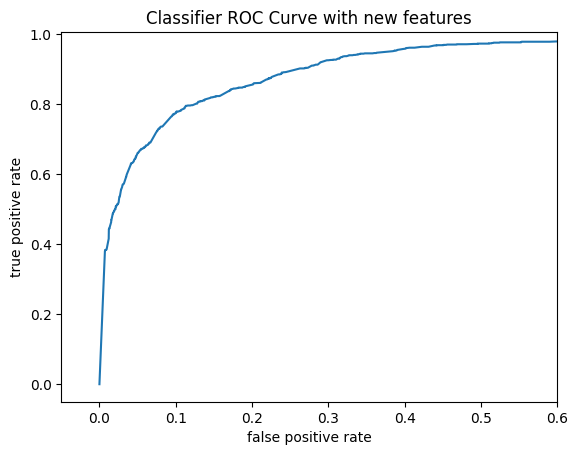

In [34]:
# plotting the false positive and true positive
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.xlim([-0.05, 0.6])
plt.ylabel('true positive rate')
plt.ylim([-0.05, 1.005])
plt.title('Classifier ROC Curve with new features')
plt.show()

In [35]:
# Assume fpr, tpr, thresholds are obtained from roc_curve
index = np.where(fpr <= 0.35)[0][-1]  # Get the last index where FPR is less than or equal to 0.35
desired_threshold = thresholds[index]
print(desired_threshold)

0.19430555555555554


Accuracy: 0.66
Precision: 0.11
Recall: 0.94
F1 Score: 0.20
Confusion Matrix:
 [[16088  8600]
 [   62  1053]]


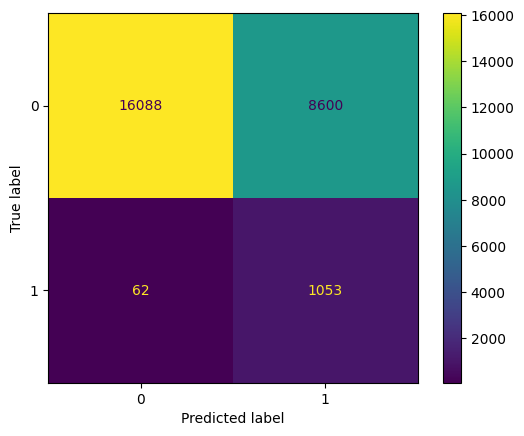

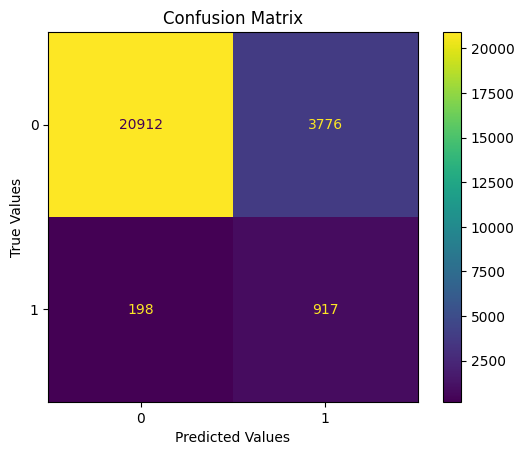

In [36]:
threshold = desired_threshold  # threshold

# Apply threshold to convert probabilities to binary predictions
predictions = (y_scores >= threshold).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate statistics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', conf_matrix)

# Confusion matrix based on our threshold
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Confusion matrix based internal optimization (not up to us how it was optimizd)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
